## Étape 1 : Préparer le Jeu de Données


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate
from sklearn.metrics import accuracy_score, classification_report


## Étape 3 : Charger et explorer les données

In [9]:
data = pd.read_csv("C:/Users/ricar/Downloads/diabetes.csv")

In [10]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [11]:
data.shape

(768, 9)

In [12]:
data.columns 


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
data.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


## Étape 4 : Prétraitement des données

In [15]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
data.isna().sum().sum()

0

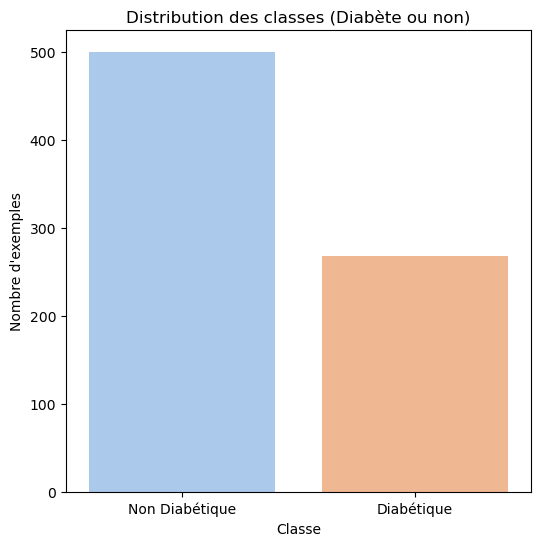

In [42]:
# Visualiser la distribution des classes (Outcome)
plt.figure(figsize=(6, 6))
sns.countplot(x='Outcome', data=data, palette='pastel')
plt.title('Distribution des classes (Diabète ou non)')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'exemples')
plt.xticks([0, 1], ['Non Diabétique', 'Diabétique'])
plt.show()


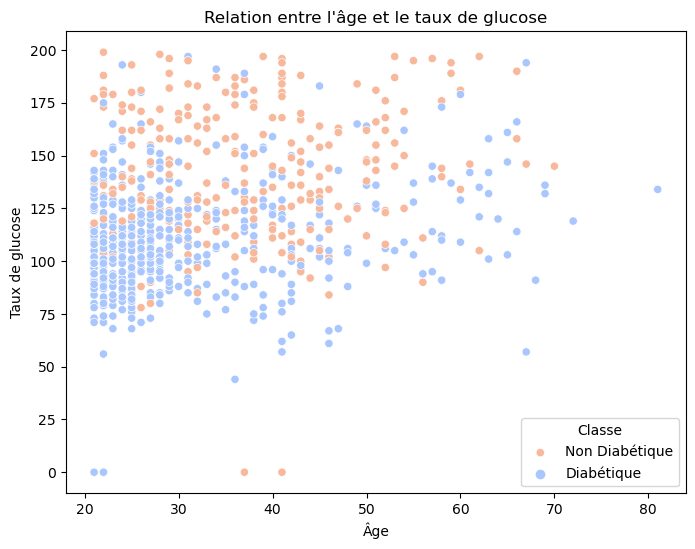

In [44]:
# Tracer la relation entre l'âge et le taux de glucose
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Glucose', data=data, hue='Outcome', palette='coolwarm')
plt.title('Relation entre l\'âge et le taux de glucose')
plt.xlabel('Âge')
plt.ylabel('Taux de glucose')
plt.legend(title='Classe', labels=['Non Diabétique', 'Diabétique'])
plt.show()


In [18]:
# Séparer les variables explicatives (X) et la variable cible (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [19]:
# Diviser en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Étape 5 : Entraîner le modèle AdaBoost 

In [20]:
# Définir un classificateur faible (arbre de décision simple)
base_model = DecisionTreeClassifier(max_depth=1)


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)


In [26]:
base_model = DecisionTreeClassifier(max_depth=1)

adaboost = AdaBoostClassifier(estimator=base_model, n_estimators=50, learning_rate=1.0, random_state=42)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

## Étape 6 : Évaluation du modèle


In [32]:
# Prédire sur les données de test
y_pred = adaboost.predict(X_test)

# Évaluer les performances
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7337662337662337
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [37]:
print(tabulate(table, headers=headers, tablefmt="grid"))

+---------+-------------+----------+------------+-----------+
|   class |   precision |   recall |   f1-score |   support |
+=========+=============+==========+============+===========+
|       0 |        0.8  |     0.79 |       0.79 |        99 |
+---------+-------------+----------+------------+-----------+
|       1 |        0.62 |     0.64 |       0.63 |        55 |
+---------+-------------+----------+------------+-----------+


In [ ]:

git remote add origin https://github.com/MFONO-M/AdaboostProject
git branch -M main  
git push -u origin main  
